 # Importing all the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

#Loading the Data

In [2]:
data = pd.read_csv(r"D:\CV Prep All\Credit Card Farud Detection\creditcard.csv")

#Understanding the Data

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Describing the Data

In [4]:
print(data.shape)
# print(data.describe())
print(data['Amount'].describe())

(284807, 31)
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


#Imbalance in the data

In [5]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


#Print the amount details for Fraudulent Transaction

In [6]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# Print the amount details for Normal Transaction

In [7]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

#Plotting the Correlation Matrix

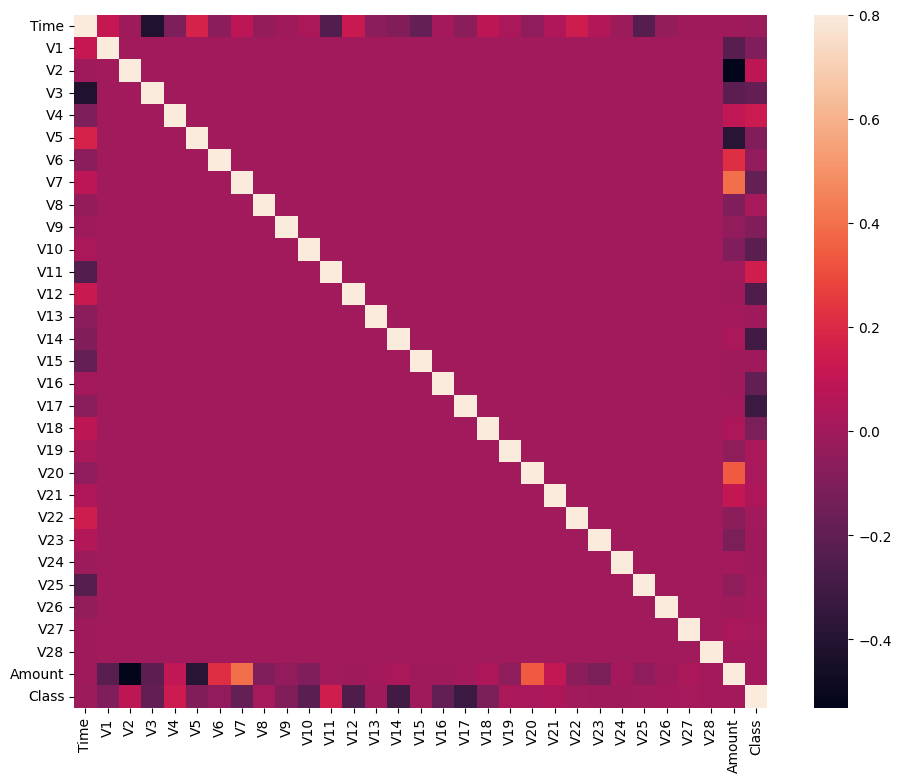

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.12

In [8]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()
print(corrmat)

#Separating the X and the Y values

In [9]:
# Downsample the majority class
valid_sampled = valid.sample(n=len(fraud), random_state=42)
balanced_data = pd.concat([fraud, valid_sampled], axis=0).sample(frac=1, random_state=42)  # Shuffle


In [10]:
# dividing the X and the Y from the dataset
X = balanced_data.drop(['Class'], axis = 1)
Y = balanced_data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(984, 30)
(984,)


#Training and Testing Data Bifurcation

In [11]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


#Building a Random Forest Model using scikit learn

In [12]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)
yScores = rfc.predict_proba(xTest)[:, 1] # probability of being a fraud

# Building all kinds of evaluating parameters

In [13]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9289340101522843
The precision is 0.9705882352941176
The recall is 0.9
The F1-Score is 0.9339622641509434
The Matthews correlation coefficient is0.8601413058812242


#Visualizing the Confusion Matrix

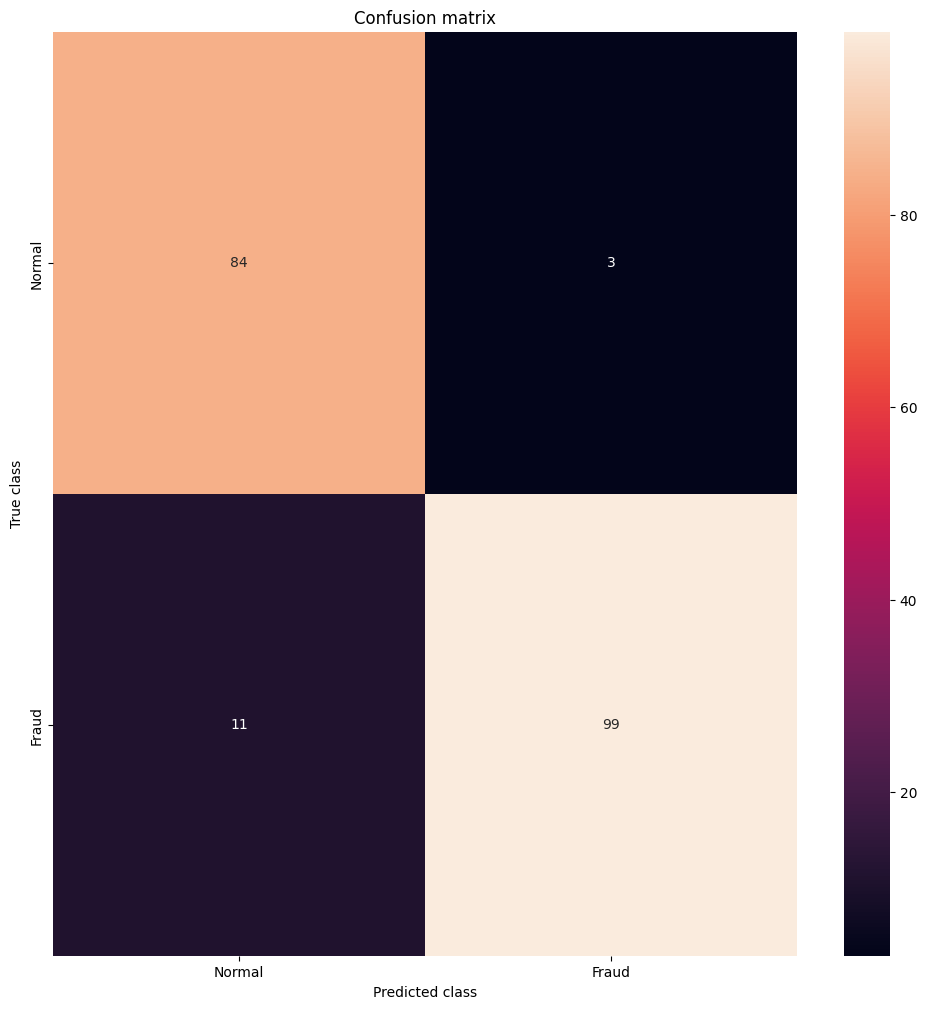

In [14]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

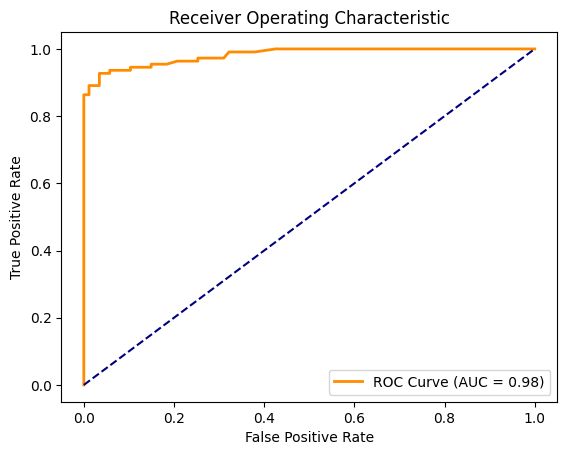

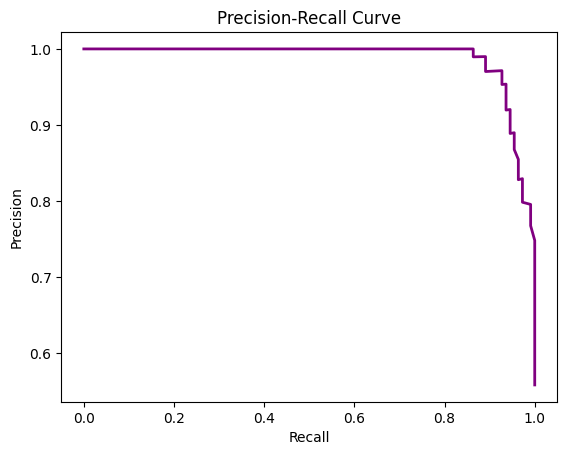

In [15]:
# --------------------- ROC Curve ---------------------
fpr, tpr, _ = roc_curve(yTest, yScores)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# --------------------- Precision-Recall Curve ---------------------
precision_vals, recall_vals, _ = precision_recall_curve(yTest, yScores)

plt.figure()
plt.plot(recall_vals, precision_vals, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()